/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem2.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem3.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem1.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem0.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem4.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem5.jpg


/Users/parth.bhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


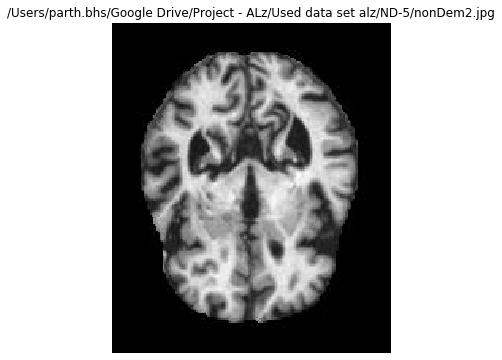

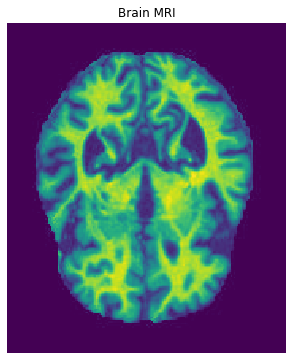

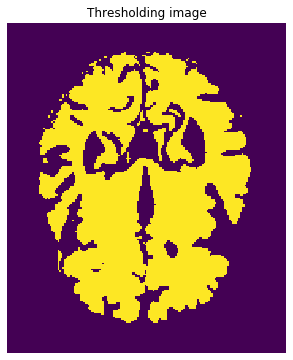

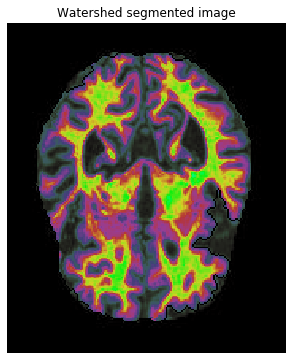

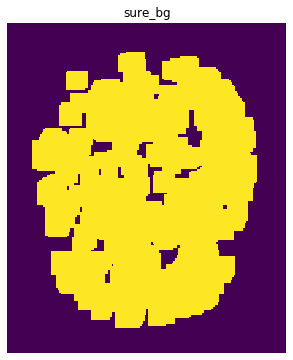

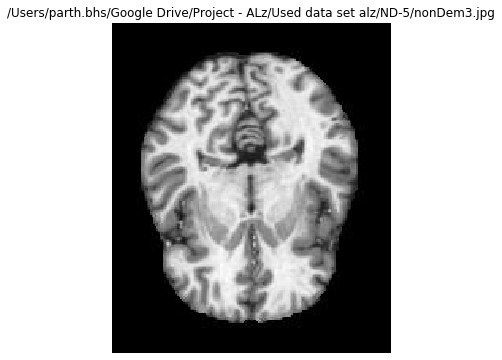

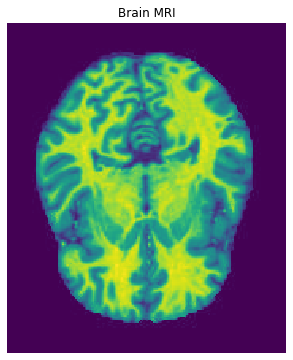

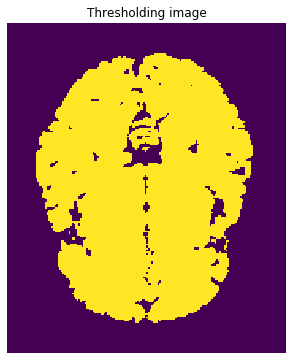

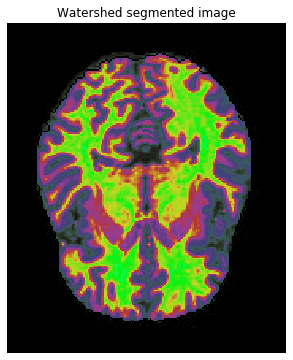

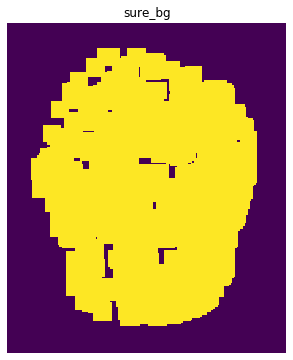

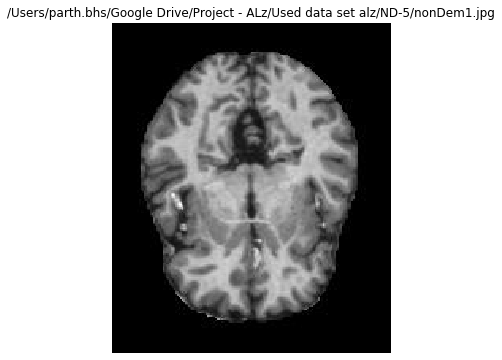

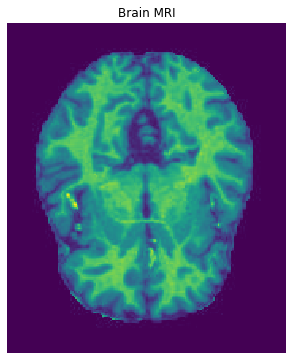

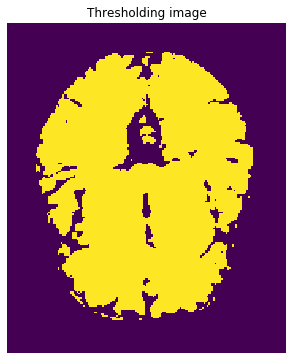

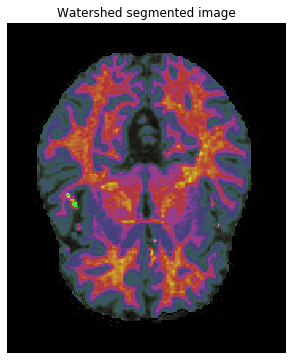

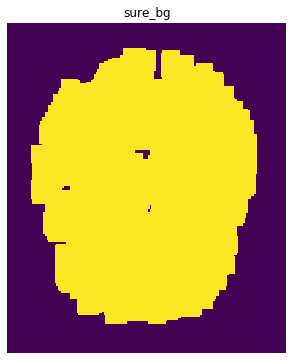

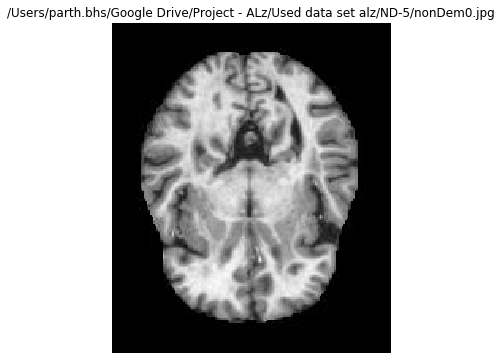

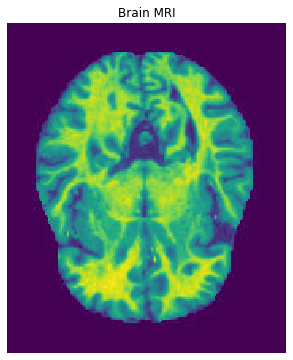

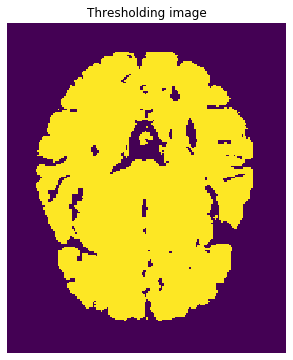

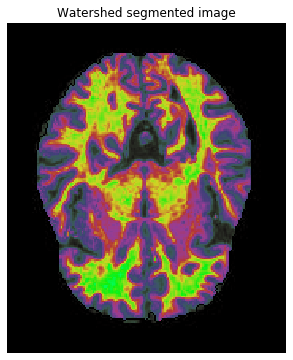

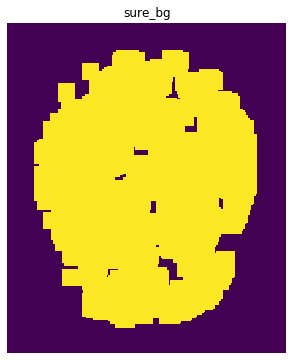

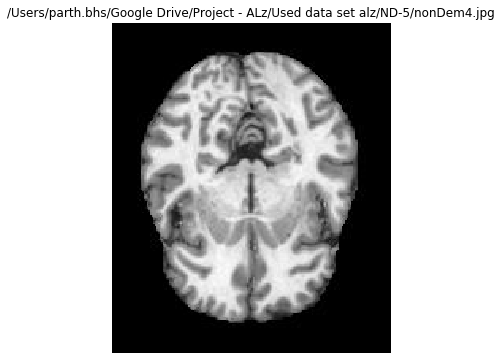

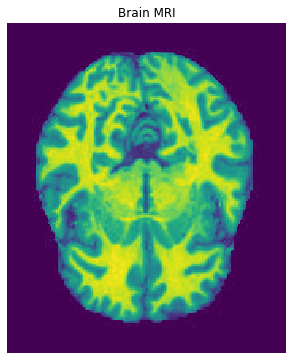

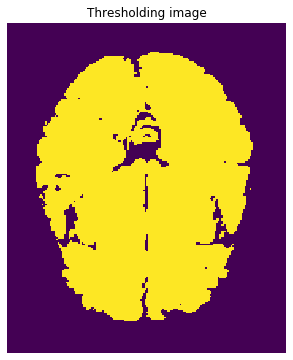

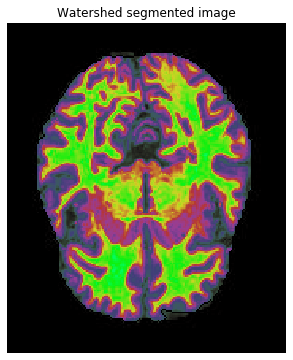

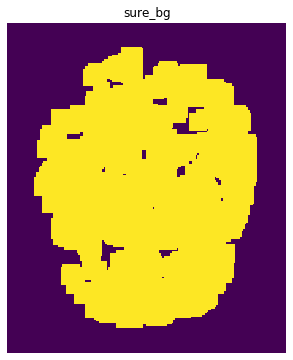

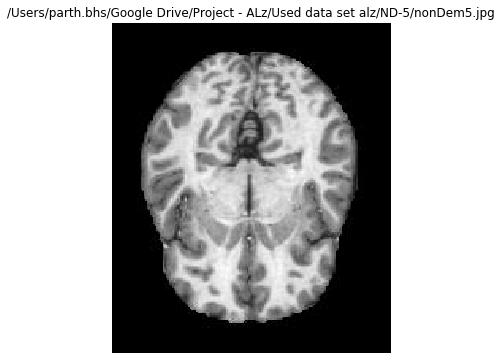

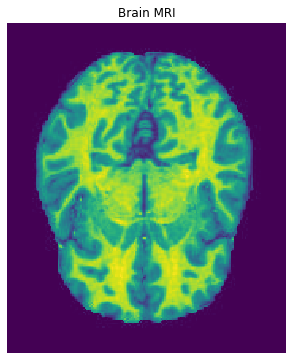

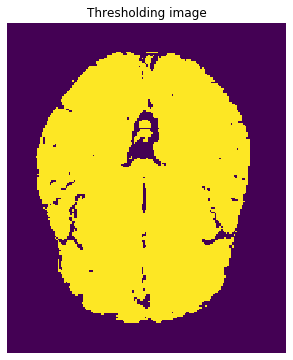

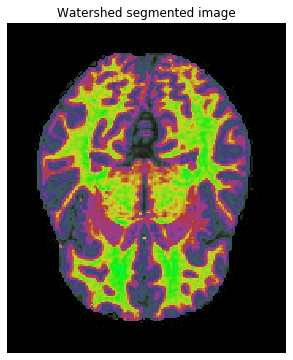

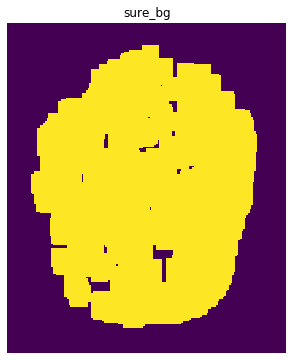

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import greycomatrix,greycoprops
from skimage import data
from PIL import Image
from PIL import Image,ImageFilter
import pandas as pd
import numpy as np
import cv2
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
import os

def ShowImage(title,img,cte):
  plt.figure(figsize=(5,10))
  plt.axis('off')
  plt.title(title)
  plt.imshow(img)

    
def processimagetobandw(orig_image):
  gray_img = cv2.cvtColor( orig_image, cv2.COLOR_BGR2GRAY ) 

# To remove salt and pepper noise
  median_filtered = cv2.medianBlur(gray_img, 5)
# 3*3 Sobel Filters
  Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  #print ("Gx \n", Gx)
  Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  #print ("Gy \n", Gy)
  img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
  img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)
#del f = Gx + Gy
# Adding mask to the image
  img_sobel = img_sobelx + img_sobely+gray_img


# Set threshold and maxValue
  threshold = 50
  maxValue = 255
 
# Threshold the pixel values
  th, thresh = cv2.threshold(img_sobel, threshold, maxValue, cv2.THRESH_BINARY)


# To remove any small white noises in the image using morphological opening. 
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

  sure_bg = cv2.dilate(opening,kernel,iterations=3)

  ShowImage('sure_bg',sure_bg,'gray')
  return sure_bg


def seg(path):
  img = cv2.imread(path)
  oim99 = img;
  ShowImage(path,img,'gray')
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ShowImage('Brain MRI',gray,'gray')

  ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

  ShowImage('Thresholding image',thresh,'gray')
  ret,markers=cv2.connectedComponents(thresh)

  marker_area=[np.sum(markers==m) for m in range(np.max(markers)) if m!=0]
  largest_component=np.argmax(marker_area)+1

  brain_mask=markers==largest_component
  brain_out=img.copy()
  brain_out[brain_mask==False] = (0,0,0)

  img=cv2.imread(path)
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


#noise removal
  kernel=np.ones((3,3),np.uint8)
  opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

#sure background area
  sure_bg=cv2.dilate(opening,kernel,iterations=3)

#finding sure foreground area
  dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
  ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

#finding unknown region
  sure_fg=np.uint8(sure_fg)
  unknown=cv2.subtract(sure_bg,sure_fg)

#marker labelling
  ret,markers=cv2.connectedComponents(sure_fg)
  markers=markers+1

  markers[unknown==255] =0
  markers=cv2.watershed(img,markers)
  img[markers== -1]=[255,0,0]
  im1=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
  ShowImage("Watershed segmented image",im1,"gray")

  brain_mask=np.uint8(brain_mask)
  kernel=np.ones((8,8),np.uint8)
  closing=cv2.morphologyEx(brain_mask,cv2.MORPH_CLOSE,kernel)
  brain_out=img.copy()
    
  sure_bang=processimagetobandw(oim99)  


  return [img,thresh,im1,brain_out,sure_bang]




######---###########

path = '/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/'
data = os.listdir(path)
#print(data)
dset = {}
for i in data:
  print(path+i)
  dset[i] = seg(path+i)
#print(dset)


In [ ]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


nonDem2.jpg
meanI = 45.10085554945062
meanJ = 45.10085554945064
taoI = 59.88135952565966
taoJ = 59.88135952565973
kontras = 486.3143884065969
Homogenitas = 0.5753087914373193
Correlation = 0.9288715615764626


nonDem3.jpg
meanI = 53.13714815934076
meanJ = 53.137148159340775
taoI = 69.1712901276803
taoJ = 69.17129012768025
kontras = 559.2352502747284
Homogenitas = 0.5849311305194724
Correlation = 0.9382602727264058


nonDem1.jpg
meanI = 40.152617225274795
meanJ = 40.152617225274795
taoI = 45.25810774034359
taoJ = 45.258107740343675
kontras = 192.45301357142984
Homogenitas = 0.6043065748989581
Correlation = 0.9514870259773494


nonDem0.jpg
meanI = 49.7505672802199
meanJ = 49.75056728021987
taoI = 63.88103752583844
taoJ = 63.881037525838536
kontras = 466.67547252747704
Homogenitas = 0.5895474055419919
Correlation = 0.9406733150408412


nonDem4.jpg
meanI = 53.86310510989031
meanJ = 53.863105109890085
taoI = 70.27027907438334
taoJ = 70.2702790743834
kontras = 565.9801942857168
Homogenitas =

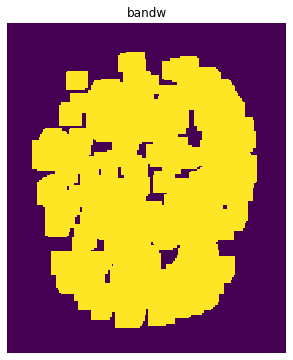

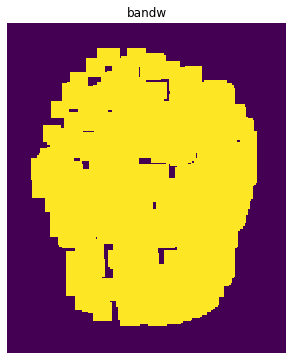

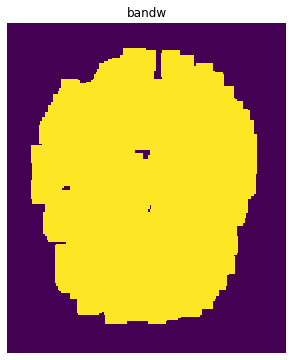

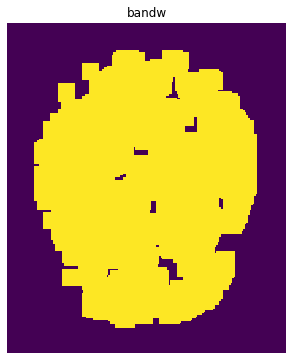

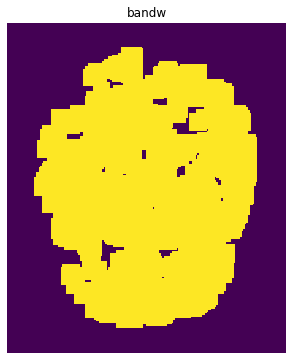

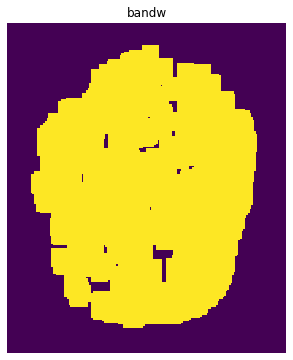

In [ ]:
#computing GLCM features 
d={'name':[],'type':[],'meanI':[],'meanJ':[],'taoI':[],'taoJ':[],'kontras':[], 'Homogenitas':[],'Correlation':[]}
import cv2
import numpy as np 
import sys
import math
import pandas as p 

class GLCM:
      def __init__(self,image,dy,dx,n,t):
          self.name=n
          self.type=t
          self.image=image
          self.dy=dy
          self.dx=dx
          self.glcm=self.GLCMcount()
          self.kontras,self.meanI,self.meanJ,self.energy,self.homogenity=self.contrast()
          self.taoI,self.taoJ=self.tao()
          self.korelasion=self.correlation()

      def GLCMcount(self):
          height,width = self.image.shape[:2]
          glcm = np.zeros((256,256,3),np.double)
          x=0
          for i in range(height):
            for j in range(width):
              if i + self.dy in range(height) and j+ self.dx in range(width):
                glcm[self.image[i,j,0],self.image[i + self.dy,j+self.dx,0],0]+=1
                glcm[self.image[i,j,1],self.image[i + self.dy,j+self.dx,1],1]+=1
                glcm[self.image[i,j,2],self.image[i + self.dy,j+self.dx,2],2]+=1
                x+=1
          glcm=glcm/x
          return glcm
    
      def contrast(self):
          contrast = np.zeros(3,np.float)
          meanI = np.zeros(3,np.float)
          meanJ = np.zeros(3,np.float)
      ####---###
          energy = np.zeros(3,np.float)
          homogenity = np.zeros(3,np.float)
          for i in range(256):
            for j in range(256):
                contrast[0] += pow(i-j,2) * self.glcm[i,j,0]
                contrast[1] += pow(i-j,2) * self.glcm[i,j,1]
                contrast[2] += pow(i-j,2) * self.glcm[i,j,2]
                meanI[0] += i * self.glcm[i,j,0]
                meanI[1] += i * self.glcm[i,j,1]
                meanI[2] += i * self.glcm[i,j,2]
                meanJ[0] += j * self.glcm[i,j,0]
                meanJ[1] += j * self.glcm[i,j,1]
                meanJ[2] += j * self.glcm[i,j,2]
                energy[0] += pow(self.glcm[i,j,0],2)
                energy[1] += pow(self.glcm[i,j,1],2)
                energy[2] += pow(self.glcm[i,j,2],2)
                homogenity[0] += self.glcm[i,j,0]/(1+abs(i-j))
                homogenity[1] += self.glcm[i,j,1]/(1+abs(i-j))
                homogenity[2] += self.glcm[i,j,2]/(1+abs(i-j))
          return contrast, meanI, meanJ,energy, homogenity
    
      def correlation(self):
          correlation = np.zeros(3,np.float)
          for i in range(256):
              for j in range(256):
                correlation[0] += ((i - self.meanI[0]) * (j - self.meanJ[0]) * self.glcm[i,j,0]) / (self.taoI[0] * self.taoJ[0])
                correlation[1] += ((i - self.meanI[1]) * (j - self.meanJ[1]) * self.glcm[i,j,1]) / (self.taoI[1] * self.taoJ[1])
                correlation[2] += ((i - self.meanI[2]) * (j - self.meanJ[2]) * self.glcm[i,j,2]) / (self.taoI[2] * self.taoJ[2])
            # print coorelations
          return correlation
      def tao(self):
          taoI = np.zeros(3,np.float)
          taoJ = np.zeros(3,np.float)
          for i in range(256):
            for j in range(256):
              taoI[0] += pow(i - self.meanI[0],2) * self.glcm[i,j,0]
              taoI[1] += pow(i - self.meanI[1],2) * self.glcm[i,j,1]
              taoI[2] += pow(i - self.meanI[2],2) * self.glcm[i,j,2]
              taoJ[0] += pow(j - self.meanJ[0],2) * self.glcm[i,j,0]
              taoJ[1] += pow(j - self.meanJ[1],2) * self.glcm[i,j,1]
              taoJ[2] += pow(j - self.meanJ[2],2) * self.glcm[i,j,2]
          for i in range(3):
            taoI[i] = math.sqrt(taoI[i])
            taoJ[i] = math.sqrt(taoJ[i])
          return taoI, taoJ

      def printglcm(self):
            print("meanI = " + str(rgb2gs(self.meanI)))
            print("meanJ = " + str(rgb2gs(self.meanJ)))
            print("taoI = " + str(rgb2gs(self.taoI)))
            print("taoJ = " + str(rgb2gs(self.taoJ)))
            print("kontras = " + str(rgb2gs(self.kontras)))
            print("Homogenitas = " + str(rgb2gs(self.homogenity)))
            print("Correlation = " + str(rgb2gs(self.korelasion)))
      def retglcm(self):
            mm = str(rgb2gs(self.meanI))
            nn = str(rgb2gs(self.meanJ))
            oo= str(rgb2gs(self.taoI))
            pp = str(rgb2gs(self.taoJ))
            qq = str(rgb2gs(self.kontras))
            rr = str(rgb2gs(self.homogenity))
            ss= str(rgb2gs(self.korelasion))
            return mm,nn,oo,pp,qq,rr,ss
            


def rgb2gs(rgb):
  val = 0.114 * (rgb[0]) + 0.587 * (rgb[1]) + 0.299 * (rgb[2])
  return val
def livencal(image):
  live =0;
  for x in range(0,200):
    for y in range(0,175):
      if(255==image[x,y]):
        live=live+1
  return live
def templobe(image):
  live =0;
  for x in range(0,200):
    for y in range(0,175):
      if(220==image[x,y]):
        live=live+1
  return live


import csv 
with open('nd_DataSet.csv',mode ='w') as f:
  fieldnames=['File_name','img_type','meanI','meanJ','taoI','taoJ','kontras', 'Homogenitas','Correlation','LiveN','Alz']
  thewriter=csv.DictWriter(f,fieldnames=fieldnames)
  thewriter.writeheader() 
  writer = csv.writer(f,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #imp. 
  for i in data :
    print(i)
    image = dset[i][2]
    im5=dset[i][4]
    glcm = GLCM(image,0,1,i,'watershed')
    glcm.printglcm()
    mm,nn,oo,pp,qq,rr,ss=glcm.retglcm()
    tt=livencal(im5)
    ShowImage("bandw",im5,"gray")
    #print(mm,'  ',nn,'  ',oo,'  ',pp,'  ',qq,'  ',rr,'  ',ss)
    #writer.writerow({'name':myval[0],'type':myval[1],'meanI':myval[2],'meanJ':myval[3],'taoI':myval[4],'taoJ':myval[5],'kontras'myval[6], 'Homogenitas':myval[7],'Correlation':myval[8]})  
    writer.writerow([i,'watershed',mm,nn,oo,pp,qq,rr,ss,tt,'0'])  
    print("\n")
#array make it 